# Custom implementation of DesicionTreeClassifier

Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

## TODO:
1. class_weight param



In [10]:
%load_ext autoreload
%autoreload 2

import weight_height_fetcher
from sklearn.metrics import f1_score
from decision_tree import CustomDecisionTree
import decision_tree_visualizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
features_train, features_valid, target_train, target_valid = weight_height_fetcher.get_splitted_data(nsamples=1000)
weight_height_fetcher.data
target_train.value_counts()

1    393
0    357
Name: gender, dtype: int64

In [120]:
%%time
model = CustomDecisionTree(max_depth=20, debug=False, criterion='gini', random_state=1, splitter='random', min_impurity_decrease=0.005, min_samples_split=10, min_samples_leaf=4)
model.fit(features_train, target_train)

Wall time: 141 ms


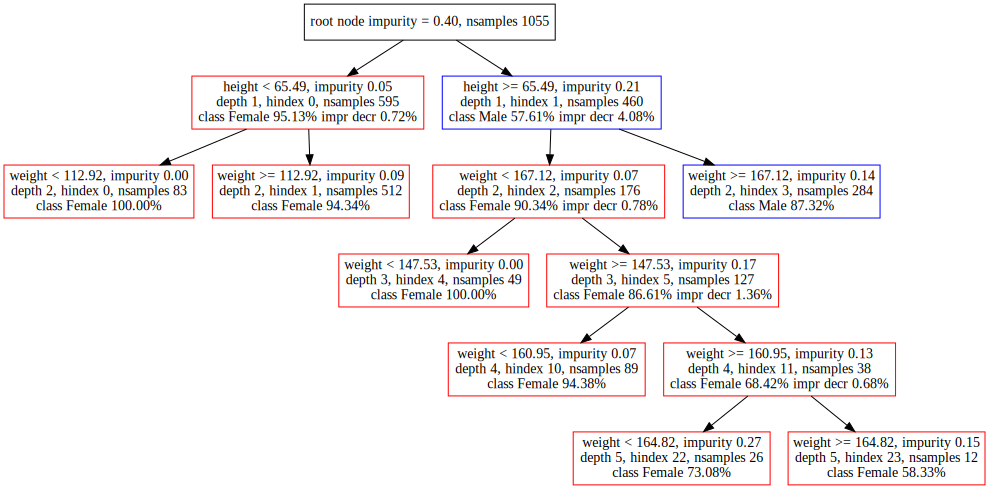

In [97]:
color_classes = {0: 'blue', 1: 'red'}
label_classes = {0: 'Male', 1: 'Female'}
decision_tree_visualizer.visualize_result(model.root_node, color_classes, label_classes, save_pdf=False)

In [121]:
%%time

def test_model(model):

    predicted_train = model.predict(features_train)
    predicted = model.predict(features_valid)
    print('train score = {:.3f}, valid score f1 = {:.3f}, depth {}'.format(f1_score(target_train, predicted_train), f1_score(target_valid, predicted), model.get_depth()))

test_model(model)

train score = 0.917, valid score f1 = 0.942, depth 8
Wall time: 37 ms


In [122]:
%%time

original_classifier = DecisionTreeClassifier(max_depth=None, splitter='random', random_state=1, min_impurity_decrease=0.005, min_samples_split=10, min_samples_leaf=4)
original_classifier.fit(features_train, target_train)

test_model(original_classifier)


train score = 0.917, valid score f1 = 0.938, depth 6
Wall time: 7.04 ms


In [123]:
dummy_classifier = DummyClassifier(random_state=1)
dummy_classifier.fit(features_train, target_train)

f1_score(target_valid, dummy_classifier.predict(features_valid))

0.512